## Homework 4

In [8]:
import nltk; print("NLTK Version:", nltk.__version__)
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import string

import pattern; print("Pattern Version:", pattern.__version__)
from pattern.en import tag

###https://spacy.io/usage/models
###https://nlpforhackers.io/complete-guide-to-spacy/
import spacy; print("Spacy Version:", spacy.__version__)
#spacy.prefer_gpu()

import pandas as pd; print("Pandas Version:", pd.__version__)

from PIL import Image; print("PIL Image Version:", Image.__version__)

NLTK Version: 3.4
Pattern Version: 3.6
Spacy Version: 2.0.16
Pandas Version: 0.24.1
PIL Image Version: 5.4.1


##### Part of Speach Tagging Function
The "tagPOS" function implements NLTK, Pattern and Spacy part of speach (POS) taggers.  The function inputs are the text to be tagged and the POS tagger to utilize.  The return value is dependent upon the POS tagger utilized.

In [35]:
def tagPOS(text, tagger):
    if tagger != "nltk" and "pattern" and "spacy":
        tagger = "nltk"
        
    if tagger=='nltk':
        tokens = nltk.word_tokenize(text)
        tagTokens = nltk.pos_tag(tokens)
    elif tagger=='pattern':
        tagTokens = tag(text)
    elif tagger == 'spacy':
        nlp = spacy.load('en')
        tagTokens = nlp(longSent)
    return tagTokens

#### Homework 4 - Question 1 - Part A
This question asks for a sentence longer than ten words to be part of speach tagged by one of the taggers implemented in the "tagPOS" function.  The sentence used is one of the sentences from the Introduction of my capstone project.  This sentence is stored in the "longSent" string variable shown below.  

In [36]:
longSent = "Throughout history, astronomy has influenced religion, guided explorers, defined food production schedules and  fueled  philosophical  questions  surrounding  our  very  existence  and  role  in  the universe."

The NLTK tagger is used to tag "longSent".  The output is shown below.

In [41]:
df = pd.DataFrame(columns=['Token', 'NLTK_POS_Tag'])

ltt = tagPOS(longSent, 'nltk')

for l in ltt:
    if l[0] != "," and ".":
        df = df.append({'Token':l[0], 'NLTK_POS_Tag':l[1]}, ignore_index=True)
    
df

,Token,NLTK_POS_Tag
0,Throughout,IN
1,history,NN
2,astronomy,NN
3,has,VBZ
4,influenced,VBN
5,religion,NN
6,guided,VBD
7,explorers,NNS
8,defined,VBD
9,food,NN


#### Homework 4 - Question 1 - Part B
This question is the second part of homework 4, question 1.  The goal of this part of the question is to tag parts of speach in a sentence shorter than ten words and is not classified 100% correctly.  The sentence is shown below in the "shortSent" variable.  

In [42]:
shortSent = "Run!"

Diagramming the short sentence illustrates the noun and verb constructs of an imperative sentence.  The understood you is not physically part of the sentence.  However, it is the noun subject of the sentence and "Run" is the verb.  

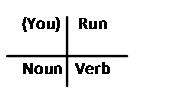

In [43]:
display(Image.open('uYouDiagram.png'))

The output from the short sentence tagging using NLTK is shown below.  NLTK appears to mis-tag the verb "Run" as a noun.  This could be a bit of a trick question.  The sentence below uses an "understood you".  In English, commands such as "Run!" carry an implied subject of "You".  The understood you is a personal pronoun.  The verb in this sentence is "Run".  There could be several reasons why NLTK mis-tagged "Run" in this sentence.  First, NLTK is likely not programmed to detect an understood you.  Second, "Run" is captialized.  This could have been lead NLTK to conclude the word is actually a named entity noun.  

In [52]:
df2 = pd.DataFrame(columns=['Token', 'NLTK_POS_Tag'])

ltts = tagPOS(shortSent, "nltk")

for l in ltts:
    df2 = df2.append({'Token':l[0], 'NLTK_POS_Tag':l[1]}, ignore_index=True)
    
df2

,Token,NLTK_POS_Tag
0,Run,NN
1,!,.


#### Homework 4 - Question 2
Question 2 from homework 4 is a two part question which requests the sentences from homework 4 question 1 be run through different POS taggers.   We will use Pattern and Spacy POS taggers.  The results of these POS taggers will be compared to the output of the NLTK POS tagger.  Examination of the dataframe shown below shown all three POS taggers tagged the long sentence exactly the same.  This is a bit surprising 

In [60]:
ltt2 = tagPOS(longSent, 'pattern')

df3 = pd.DataFrame(columns=['Token', 'Pattern_POS_Tag'])

for l in ltt2:
    if l[0] != ',':
        df3 = df3.append({'Token':l[0], 'Pattern_POS_Tag':l[1]}, ignore_index=True)
        
df['Pattern_POS_Tag'] = df3['Pattern_POS_Tag']

ltt3 = tagPOS(longSent, "spacy")

df4 = pd.DataFrame(columns=['Token', 'Spacy_POS_Tag'])

for l in ltt3:
    if l[0] != ',':
        df4 = df4.append({'Token':l[0], 'Spacy_POS_Tag':l[1]}, ignore_index=True) 
        
df['Spacy_POS_Tag'] = df4['Spacy_POS_Tag']

df

,Token,NLTK_POS_Tag,Pattern_POS_Tag,Spacy_POS_Tag
0,Throughout,IN,IN,IN
1,history,NN,NN,NN
2,astronomy,NN,NN,NN
3,has,VBZ,VBZ,VBZ
4,influenced,VBN,VBN,VBN
5,religion,NN,NN,NN
6,guided,VBD,VBD,VBD
7,explorers,NNS,NNS,NNS
8,defined,VBD,VBD,VBD
9,food,NN,NN,NN


In [49]:
#print([(l.text, l.tag_) for l in ltt3a if l.text != ' ' and ','])

In [16]:
print(tagPOS(shortSent, "pattern"))

[('Run', 'NN'), ('!', '.')]


In [17]:
print(tagPOS(shortSent, "spacy"))

[('Run', 'NN'), ('!', '.')]


In [15]:
type(ltt3)

spacy.tokens.doc.Doc

#### Homework 4 - Question 3 - Part A